# Abundance Evolution

LINX is fast enough to be able to generate substantial amounts of data in a short time.  Here we leverage that speed to make a number of different plots exploring the evolution of different element abundances during BBN.

## Preamble

In [1]:
%load_ext autoreload

In [2]:
%autoreload

import sys
sys.path.append('..')

from jax import numpy as jnp

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation as animation 

%matplotlib inline

from plot_params import params
#pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In this notebook, we examine the evolution of abundances as a function of time. 

The class that computes all abundances is `linx.abundances.AbundanceModel`. 

In [4]:
from linx.background import BackgroundModel
from linx.nuclear import NuclearRates 
from linx.abundances import AbundanceModel
from linx.thermo import T_g 
from linx.const import mn, mp, eta0

First, we begin as always by computing the background quantities. We do this for Standard BBN (SBBN). 

In [5]:
bkg_model = BackgroundModel()

# Call the class. 
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(0.), T_end=0.0001)

`\         /´  ||||        ||||  |||||     ||||  ||||   ||||
 /\_______/\   ||||        ||||  |||||||   ||||   |||| ||||
 ) __` ´__ (   ||||        ||||  |||| |||| ||||    |||||||
/  `-|_|-´  \  ||||        ||||  ||||  |||| |||    ||||||| 
/   (_x_)   \  ||||||||||  ||||  ||||   |||||||   |||| ||||
  )  `-´  (    ||||||||||  ||||  ||||    ||||||  ||||   ||||
 
Compiling thermodynamics model...


/home/mkwok/miniconda3/envs/linx/lib/python3.13/site-packages/equinox/_jit.py:55: UserWarning: `diffrax.diffeqsolve(..., discrete_terminating_event=...)` is deprecated in favour of the more general `diffrax.diffeqsolve(..., event=...)` interface. This will be removed in some future version of Diffrax.
  out = fun(*args, **kwargs)


We also obtain the photon temperature, and define two functions that convert between photon temperature and time, which will be useful for plotting. 

In [10]:
bkg_model1 = BackgroundModel()
# Call the class. 
t_vec1, a_vec1, rho_g_vec1, rho_nu_vec1, rho_NP_vec1, p_NP_vec1, Neff_vec1 = bkg_model1(jnp.asarray(0.), T_start = 1, T_end=0.0001)

`\         /´  ||||        ||||  |||||     ||||  ||||   ||||
 /\_______/\   ||||        ||||  |||||||   ||||   |||| ||||
 ) __` ´__ (   ||||        ||||  |||| |||| ||||    |||||||
/  `-|_|-´  \  ||||        ||||  ||||  |||| |||    ||||||| 
/   (_x_)   \  ||||||||||  ||||  ||||   |||||||   |||| ||||
  )  `-´  (    ||||||||||  ||||  ||||    ||||||  ||||   ||||
 
Compiling thermodynamics model...


/home/mkwok/miniconda3/envs/linx/lib/python3.13/site-packages/equinox/_jit.py:55: UserWarning: `diffrax.diffeqsolve(..., discrete_terminating_event=...)` is deprecated in favour of the more general `diffrax.diffeqsolve(..., event=...)` interface. This will be removed in some future version of Diffrax.
  out = fun(*args, **kwargs)


In [9]:
T_g_vec = T_g(rho_g_vec)

def t_to_T(t):
    
    return jnp.interp(t, t_vec, T_g_vec, left=T_g_vec[0]*2, right=T_g_vec[-1]/2)

def T_to_t(T):

    return jnp.interp(T, jnp.flip(T_g_vec), jnp.flip(t_vec), left=t_vec[-1]/2, right=t_vec[0]*2)

In [6]:
t_vec

Array([2.00485853e-04, 4.15601677e-04, 6.90820992e-04, 1.05191297e-03,
       1.41300495e-03, 1.78118062e-03, 2.17127334e-03, 2.56557942e-03,
       3.03290476e-03, 3.50023010e-03, 3.98370578e-03, 4.42906677e-03,
       5.02617288e-03, 5.54342634e-03, 5.98702541e-03, 6.43062449e-03,
       6.91154646e-03, 7.50898730e-03, 8.18261433e-03, 8.96526839e-03,
       9.75661867e-03, 1.03324041e-02, 1.09491877e-02, 1.12853871e-02,
       1.18473421e-02, 1.25603756e-02, 1.32866894e-02, 1.40130032e-02,
       1.47393171e-02, 1.56240003e-02, 1.65086835e-02, 1.74067317e-02,
       1.83369937e-02, 1.93295359e-02, 2.03441210e-02, 2.14033681e-02,
       2.24819558e-02, 2.36061303e-02, 2.47573847e-02, 2.59309775e-02,
       2.71655611e-02, 2.84644878e-02, 2.98257241e-02, 3.11869603e-02,
       3.25678084e-02, 3.39817868e-02, 3.54836879e-02, 3.70515107e-02,
       3.88441554e-02, 4.06618890e-02, 4.24796227e-02, 4.43574495e-02,
       4.62352763e-02, 4.81131031e-02, 5.01382472e-02, 5.22032795e-02,
      

In [23]:
t_vec1

Array([1.00000001e-02, 3.17785053e-02, 5.92238644e-02, 8.69034923e-02,
       1.15292009e-01, 1.43680525e-01, 1.72069041e-01, 2.01427875e-01,
       2.32297608e-01, 2.64844035e-01, 2.98455789e-01, 3.32844512e-01,
       3.67233235e-01, 4.03345854e-01, 4.39458473e-01, 4.75571092e-01,
       5.13240375e-01, 5.50909658e-01, 5.90370576e-01, 6.41596973e-01,
       6.93296363e-01, 7.45561664e-01, 7.97826964e-01, 8.66106606e-01,
       9.34818851e-01, 1.00353110e+00, 1.06378998e+00, 1.12408689e+00,
       1.18721173e+00, 1.25379168e+00, 1.33860434e+00, 1.42389601e+00,
       1.51586733e+00, 1.60783865e+00, 1.69980997e+00, 1.79178130e+00,
       1.88529102e+00, 1.98057120e+00, 2.07688435e+00, 2.17319750e+00,
       2.26951066e+00, 2.39190190e+00, 2.51939746e+00, 2.64689303e+00,
       2.77503990e+00, 2.90481813e+00, 3.06740390e+00, 3.21286162e+00,
       3.35854027e+00, 3.50421892e+00, 3.65417479e+00, 3.80413067e+00,
       3.99630874e+00, 4.19110520e+00, 4.38590166e+00, 4.58069811e+00,
      

In [7]:
T_vec_acro = jnp.array([5.65030976e+01, 4.08030950e+01, 3.20804299e+01, 2.62093418e+01,
       2.27230039e+01, 2.03026350e+01, 1.84281409e+01, 1.69763570e+01,
       1.56291910e+01, 1.45565263e+01, 1.36486869e+01, 1.29458623e+01,
       1.21529257e+01, 1.15715209e+01, 1.11338281e+01, 1.07420630e+01,
       1.03605890e+01, 9.93865134e+00, 9.51946738e+00, 9.09310306e+00,
       8.71533679e+00, 8.46824333e+00, 8.22552795e+00, 8.10170598e+00,
       7.90665540e+00, 7.67830685e+00, 7.46491388e+00, 7.26837208e+00,
       7.08657545e+00, 6.88253749e+00, 6.69516483e+00, 6.51979658e+00,
       6.35192628e+00, 6.18637988e+00, 6.02986269e+00, 5.87850217e+00,
       5.73552521e+00, 5.59707818e+00, 5.46520191e+00, 5.33992568e+00,
       5.21701560e+00, 5.09644451e+00, 4.97865152e+00, 4.86866779e+00,
       4.76423042e+00, 4.66396232e+00, 4.56410116e+00, 4.46641132e+00,
       4.36205090e+00, 4.26336504e+00, 4.17108974e+00, 4.08179035e+00,
       3.99799323e+00, 3.91915565e+00, 3.83915179e+00, 3.76241844e+00,
       3.69011132e+00, 3.61938333e+00, 3.54706777e+00, 3.47728013e+00,
       3.40987448e+00, 3.34443463e+00, 3.28262523e+00, 3.22412262e+00,
       3.15904194e+00, 3.09507231e+00, 3.03347033e+00, 2.97090401e+00,
       2.90697555e+00, 2.84391533e+00, 2.79084432e+00, 2.74063985e+00,
       2.69305287e+00, 2.63121896e+00, 2.57346089e+00, 2.51907932e+00,
       2.46489048e+00, 2.41405784e+00, 2.36531373e+00, 2.31760966e+00,
       2.27096556e+00, 2.22534890e+00, 2.18206893e+00, 2.14076630e+00,
       2.09894443e+00, 2.05819987e+00, 2.01733592e+00, 1.97829624e+00,
       1.93861477e+00, 1.90123271e+00, 1.87275755e+00, 1.84351910e+00,
       1.81561099e+00, 1.78822327e+00, 1.75549085e+00, 1.72763936e+00,
       1.69935702e+00, 1.67242240e+00, 1.64673181e+00, 1.61750098e+00,
       1.58037547e+00, 1.55141216e+00, 1.52398874e+00, 1.49887367e+00,
       1.47764702e+00, 1.45622325e+00, 1.43371143e+00, 1.41005458e+00,
       1.38433613e+00, 1.36001053e+00, 1.33215572e+00, 1.30385793e+00,
       1.27672043e+00, 1.24753384e+00, 1.21886702e+00, 1.19160755e+00,
       1.16611476e+00, 1.14174917e+00, 1.11478768e+00, 1.08966890e+00,
       1.06586555e+00, 1.04333928e+00, 1.02160303e+00, 1.00036365e+00,
       9.80142405e-01, 9.61115545e-01, 9.43063410e-01, 9.25727640e-01,
       9.10576914e-01, 8.96157682e-01, 8.81998480e-01, 8.68500704e-01,
       8.55614513e-01, 8.39149908e-01, 8.23344034e-01, 8.06727598e-01,
       7.93013463e-01, 7.79867098e-01, 7.63114124e-01, 7.47418586e-01,
       7.32674013e-01, 7.18502771e-01, 7.04788906e-01, 6.91850322e-01,
       6.79617011e-01, 6.68002078e-01, 6.56978988e-01, 6.46000026e-01,
       6.35219106e-01, 6.24976508e-01, 6.12680418e-01, 6.01105239e-01,
       5.90183507e-01, 5.77520281e-01, 5.65666680e-01, 5.54540407e-01,
       5.44070334e-01, 5.33944135e-01, 5.24385714e-01, 5.15344176e-01,
       5.06647604e-01, 4.98274690e-01, 4.88811341e-01, 4.79892599e-01,
       4.71361939e-01, 4.63149415e-01, 4.55373829e-01, 4.46553556e-01,
       4.38254470e-01, 4.30407419e-01, 4.22991768e-01, 4.15866607e-01,
       4.09755583e-01, 4.03923477e-01, 3.98349774e-01, 3.92832459e-01,
       3.86478543e-01, 3.80026513e-01, 3.73704582e-01, 3.67690086e-01,
       3.61868586e-01, 3.56298605e-01, 3.50810962e-01, 3.45367045e-01,
       3.40189858e-01, 3.34236626e-01, 3.28605764e-01, 3.23275291e-01,
       3.18219419e-01, 3.13067735e-01, 3.08181931e-01, 3.02930405e-01,
       2.97964821e-01, 2.93260158e-01, 2.87979953e-01, 2.83004700e-01,
       2.78857233e-01, 2.74074540e-01, 2.69557037e-01, 2.65281047e-01,
       2.61191905e-01, 2.56219609e-01, 2.50891237e-01, 2.45921748e-01,
       2.41272526e-01, 2.36910479e-01, 2.32807068e-01, 2.28884648e-01,
       2.25180342e-01, 2.21606219e-01, 2.18143634e-01, 2.14860952e-01,
       2.10987531e-01, 2.07345662e-01, 2.03912920e-01, 2.00186127e-01,
       1.97053301e-01, 1.94084757e-01, 1.91175796e-01, 1.87715653e-01,
       1.84464731e-01, 1.81350458e-01, 1.78273584e-01, 1.75300531e-01,
       1.72493943e-01, 1.69838474e-01, 1.67192755e-01, 1.64685782e-01,
       1.61903693e-01, 1.59247561e-01, 1.56737594e-01, 1.53832291e-01,
       1.51080294e-01, 1.48456639e-01, 1.45984745e-01, 1.43114199e-01,
       1.40398469e-01, 1.37852640e-01, 1.35388177e-01, 1.32994512e-01,
       1.30581272e-01, 1.28280144e-01, 1.26004689e-01, 1.23741532e-01,
       1.21478289e-01, 1.19209665e-01, 1.16934569e-01, 1.14662699e-01,
       1.12450666e-01, 1.10372498e-01, 1.08414302e-01, 1.06498039e-01,
       1.04541886e-01, 1.02542304e-01, 1.00373338e-01, 9.81939530e-02,
       9.59661777e-02, 9.36850416e-02, 9.15625530e-02, 8.93551675e-02,
       8.70814466e-02, 8.47173295e-02, 8.23149196e-02, 7.98666924e-02,
       7.68545340e-02, 7.31790278e-02, 6.96408946e-02, 6.62183216e-02,
       6.32367631e-02, 6.00028895e-02, 5.69463093e-02, 5.39727359e-02,
       5.11373737e-02, 4.84096275e-02, 4.58067681e-02, 4.33269121e-02,
       4.09729425e-02, 3.87462427e-02, 3.66418598e-02, 3.46538105e-02,
       3.27743114e-02, 3.09965682e-02, 2.93139844e-02, 2.77202853e-02,
       2.62107249e-02, 2.47803909e-02, 2.34248445e-02, 2.21401138e-02,
       2.09224935e-02, 1.97685095e-02, 1.86748895e-02, 1.76385381e-02,
       1.66565275e-02, 1.57260791e-02, 1.48445600e-02, 1.40094708e-02,
       1.32184408e-02, 1.24692212e-02, 1.17596779e-02, 1.10877881e-02,
       1.04516318e-02, 9.84938791e-03, 9.27932892e-03, 8.73981589e-03,
       8.22929300e-03, 7.74628499e-03, 7.28939124e-03, 6.85728196e-03,
       6.44869590e-03, 6.06243468e-03, 5.69736062e-03, 5.35239404e-03,
       5.02650916e-03, 4.71873196e-03, 4.42813729e-03, 4.15384648e-03,
       3.89502444e-03, 3.65087754e-03, 3.42065132e-03, 3.20362881e-03,
       2.99912830e-03, 2.80650143e-03, 2.62513145e-03, 2.45443139e-03,
       2.29384292e-03, 2.14283465e-03, 2.00090066e-03, 1.86755911e-03,
       1.74235111e-03, 1.62483962e-03, 1.51460830e-03, 1.41126036e-03,
       1.31441764e-03, 1.22371978e-03, 1.13882331e-03, 1.05940089e-03,
       9.85140547e-04, 9.15745026e-04, 8.50931096e-04, 7.90429041e-04,
       7.33982238e-04, 6.81346496e-04, 6.32289652e-04, 5.86591132e-04,
       5.44041560e-04, 5.04442342e-04, 4.67605325e-04, 4.33352400e-04,
       4.01515232e-04, 3.71934857e-04, 3.44461327e-04, 3.18953403e-04,
       2.95278175e-04, 2.73310689e-04, 2.52933639e-04, 2.34037028e-04,
       2.16517778e-04, 2.00279335e-04, 1.85231498e-04, 1.71289951e-04,
       1.58375937e-04, 1.46415970e-04, 1.35341595e-04, 1.25089001e-04,
       1.15598696e-04, 1.06815400e-04, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05,
       9.86876657e-05, 9.86876657e-05, 9.86876657e-05, 9.86876657e-05])

In [16]:
T_vec_acro2 = jnp.array([77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 77.40610131,
       77.40610131, 77.40610131, 77.40610131, 77.40610131, 75.09691487,
       72.85083017, 70.66461616, 68.53528083, 66.46014972, 64.43672646,
       62.46281124, 60.53642745, 58.65592608, 56.81986719, 55.02712983,
       53.2767972 , 51.56824653, 49.90112133, 48.27524617, 46.6906194 ,
       45.14738415, 43.64582549, 42.18618667, 40.76874913, 39.39368325,
       38.06105647, 36.77082744, 35.52275979, 34.31650139, 33.15149568,
       32.02704281, 30.94228917, 29.89626919, 28.8878971 , 27.91604781,
       26.97951101, 26.07708572, 25.20754021, 24.36966261, 23.56225345,
       22.78414506, 22.03420374, 21.31133681, 20.61449541, 19.94267661,
       19.29492353, 18.67032135, 18.06799914, 17.48712786, 16.92691638,
       16.3866022 , 15.86546681, 15.36280689, 14.87796015, 14.41027338,
       13.95913233, 13.52394377, 13.10411887, 12.69909968, 12.30833707,
       11.93130307, 11.56748129, 11.21637432, 10.87749736, 10.55038246,
       10.23457496,  9.92963548,  9.6351416 ,  9.35068437,  9.07586778,
        8.81031403,  8.55365869,  8.30555084,  8.0656543 ,  7.83364625,
        7.60921899,  7.39207764,  7.18193898,  6.97853262,  6.78160212,
        6.59090043,  6.40619239,  6.22725318,  6.05386775,  5.88583079,
        5.72294411,  5.56501569,  5.41185988,  5.26328313,  5.11910987,
        4.97915874,  4.84314258,  4.71104924,  4.58232561,  4.4572956 ,
        4.33556656,  4.2173313 ,  4.10093918,  3.9893715 ,  3.88163403,
        3.77744691,  3.67975768,  3.58314865,  3.49145515,  3.40234667,
        3.318693  ,  3.23698815,  3.16834221,  3.11450691,  3.06457644,
        3.01913474,  2.978046  ,  2.93620386,  2.89705783,  2.86049758,
        2.82536577,  2.79251817,  2.75840048,  2.72596904,  2.69503404,
        2.66572233,  2.63878674,  2.61265708,  2.58907443,  2.56471391,
        2.53950405,  2.51584412,  2.49134912,  2.46737639,  2.44455987,
        2.42092039,  2.39739088,  2.37817264,  2.35834319,  2.3391725 ,
        2.31937602,  2.30075289,  2.28200322,  2.26263113,  2.24351182,
        2.22372822,  2.20423616,  2.18435887,  2.16442641,  2.14373549,
        2.12616555,  2.10878839,  2.09148612,  2.07359236,  2.05505906,
        2.03583271,  2.01924161,  2.00297912,  1.98658027,  1.9700596 ,
        1.95316089,  1.93586552,  1.92160564,  1.90691435,  1.89176193,
        1.87648185,  1.8607339 ,  1.84489993,  1.82870733,  1.8142199 ,
        1.79926825,  1.78404184,  1.77070249,  1.7569645 ,  1.74310645,
        1.7288135 ,  1.71675955,  1.70437488,  1.69173629,  1.67946579,
        1.66684803,  1.65409494,  1.64096306,  1.62742714,  1.61345975,
        1.59920351,  1.58446308,  1.56920148,  1.55673288,  1.54388989,
        1.53098086,  1.5178368 ,  1.50426997,  1.49024993,  1.47574282,
        1.46320051,  1.45203771,  1.43895525,  1.42552768,  1.41164261,
        1.40008997,  1.38830268,  1.37623114,  1.36378212,  1.35092872,
        1.33782299,  1.32728293,  1.31644964,  1.30562698,  1.29449162,
        1.28304061,  1.26982014,  1.25892567,  1.24784941,  1.23649403,
        1.22478093,  1.21317604,  1.20377874,  1.19413305,  1.18422393,
        1.17414555,  1.163971  ,  1.153672  ,  1.14306429,  1.13212644,
        1.12083459,  1.11002325,  1.0989244 ,  1.08995135,  1.08121875,
        1.07266044,  1.06388316,  1.05358336,  1.04295163,  1.03203301,
        1.02341987,  1.01457012,  1.00556843,  0.99639012,  0.98913305,
        0.98204496,  0.97479174,  0.96767477,  0.96038916,  0.95292547,
        0.94564312,  0.93818049,  0.93070203,  0.92327671,  0.91605696,
        0.90902152,  0.90205294,  0.89491224,  0.88758931,  0.88026331,
        0.87280693,  0.86674591])

## SBBN Abundance Evolution

We are now ready to compute the abundances in SBBN. We use the `key_PRIMAT_2023` rates, setting the baryon abundance $\Omega_b h^2$, the neutron decay lifetime $\tau_n$ and all nuclear rates to their default value. 

We set `save_history=True`, which tells the solver to return the full evolution of all abundances. The output of `AbundanceModel` when this flag is set to `True` is a Diffrax `Solution` class, which evaluate at points given by `t_vec` to obtain an array of abundances. 

## Comparing t(T) in ACROPOLIS and LINX

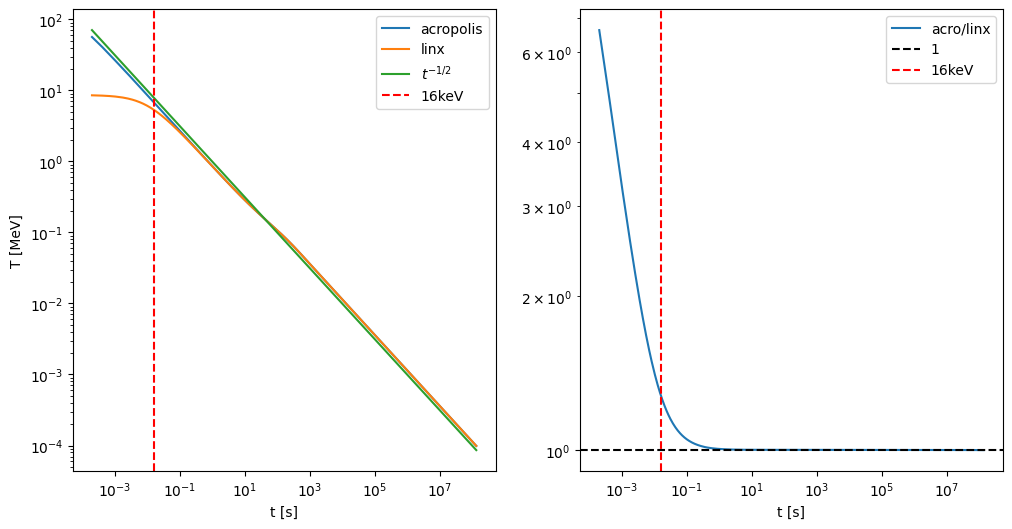

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.loglog(t_vec, T_vec_acro, label = 'acropolis')
plt.loglog(t_vec,  T_g(rho_g_vec), label = 'linx')
plt.loglog(t_vec, jnp.power(t_vec, -1/2), label = r'$t^{-1/2}$')
plt.axvline(0.016, label = "16keV", color='r', linestyle='--')
plt.legend()
plt.ylabel('T [MeV]')
plt.xlabel('t [s]')

plt.subplot(122)
plt.loglog(t_vec, T_vec_acro/ T_g(rho_g_vec), label = 'acro/linx')
plt.xlabel('t [s]')
plt.axhline(1, color='k', linestyle='--', label='1')
plt.axvline(0.016, label = "16keV", color='r', linestyle='--')
plt.legend()

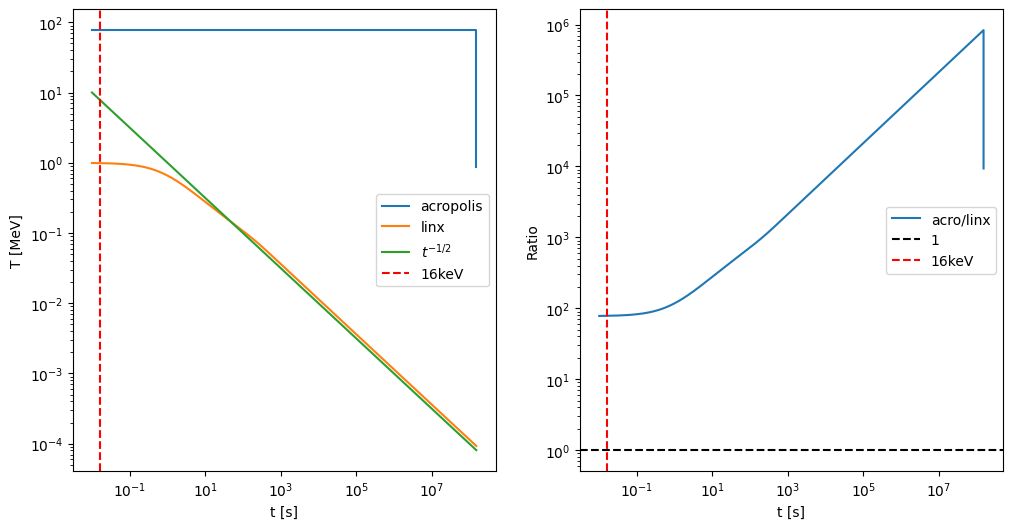

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.loglog(t_vec1, T_vec_acro2, label = 'acropolis')
plt.loglog(t_vec1,  T_g(rho_g_vec1), label = 'linx')
plt.loglog(t_vec1, jnp.power(t_vec1, -1/2), label = r'$t^{-1/2}$')
plt.xscale('log')
plt.ylabel('T [MeV]')
plt.xlabel('t [s]')
plt.axvline(0.016, label = "16keV", color='r', linestyle='--')
plt.legend()


plt.subplot(122)
plt.loglog(t_vec1, T_vec_acro2/ T_g(rho_g_vec1), label = 'acro/linx')
plt.xlabel('t [s]')
plt.axhline(1, color='k', linestyle='--', label='1')
plt.axvline(0.016, label = "16keV", color='r', linestyle='--')
plt.ylabel('Ratio')
#plt.ylim(1, 10)
plt.legend()


In [43]:
abd_model = AbundanceModel(
    NuclearRates(nuclear_net='key_PRIMAT_2023')
)

nuclear_rates_q = jnp.zeros(12)

sol = abd_model(
    rho_g_vec, rho_nu_vec, 
    rho_NP_vec, p_NP_vec,
    t_vec=t_vec, a_vec=a_vec, 
    eta_fac = jnp.asarray(1.), 
    tau_n_fac = jnp.asarray(1.), 
    nuclear_rates_q = nuclear_rates_q,
    save_history=True 
)

abundances = jnp.array([sol.evaluate(t) for t in t_vec])


Compiling abundance model...


First, let's focus just on the abundances of neutrons and protons. We can see here that they are initially in chemical equilibrium, but fall out of chemical equilibrium at around $T_\gamma = $ 0.8 MeV. After that, neutrons decay freely, until the Universe is cool enough that the deuterium bottleneck is overcome, i.e. deuterium nuclei can form without being broken up by photons, which happens at around 0.08 MeV. 

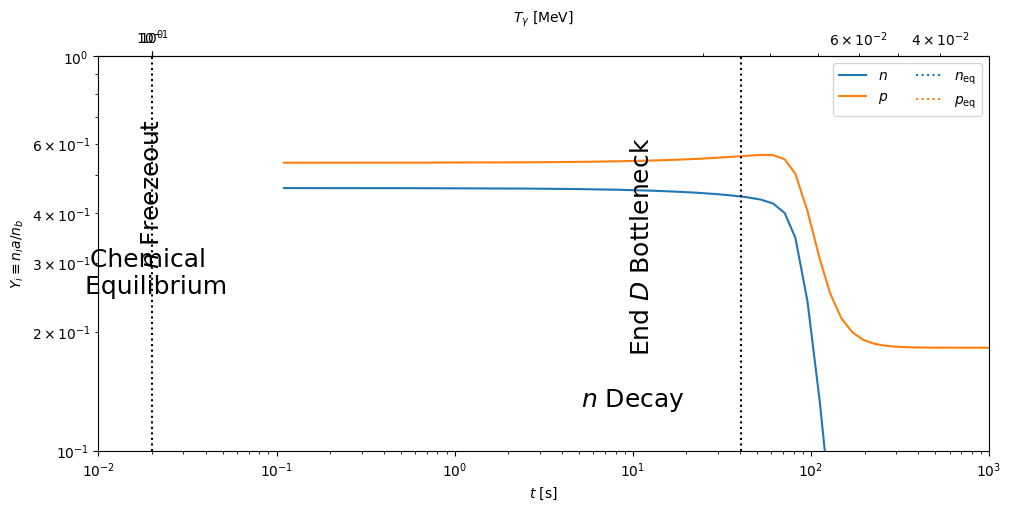

In [8]:
fig, ax = plt.subplots(layout='constrained', figsize=(10,5))

ax.loglog(t_vec, abundances[:, 0], label=r'$n$')
ax.loglog(t_vec, abundances[:, 1], label=r'$p$')

ax.set_prop_cycle(None)

Q = mn - mp

ax.loglog(t_vec, jnp.exp(-Q / T_g_vec) / (1. + jnp.exp(-Q / T_g_vec)), ':', label=r'$n_\mathrm{eq}$')

ax.loglog(t_vec, 1. / (1. + jnp.exp(-Q / T_g_vec)), ':', label=r'$p_\mathrm{eq}$')


ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$Y_i \equiv n_i a/ n_b$')

ax.tick_params(axis = 'x', which='both', top=False)

ax.axvline(T_to_t(0.84), color='k', ls=':')
ax.axvline(T_to_t(0.085), color='k', ls=':')

ax.text(T_to_t(.95), 0.45, r'$n$ Freezeout', rotation='vertical', va='center', ha='center', fontsize=18)
ax.text(T_to_t(0.095), 0.33, r'End $D$ Bottleneck', rotation='vertical', va='center', ha='center', fontsize=18)
ax.text(T_to_t(4), 0.25, 'Chemical \n Equilibrium', ha='center', fontsize=18)
ax.text(10., 0.13, r'$n$ Decay', ha='center', fontsize=18)


secax = ax.secondary_xaxis('top', functions=(t_to_T, T_to_t))
secax.set_xlabel(r'$T_\gamma$ [MeV]')

ax.set_xlim(1e-2, 1000)
ax.set_ylim(0.1, 1.)


plt.legend(ncol=2)

We now plot the rest of the elemental abundances at later times, around the time when the deuterium bottleneck is ending. 

In [9]:
import linx.thermo as thermo
from linx.thermo import rho_EM_std_v, p_EM_std_v, nB
import linx.const as const 
from linx.const import ma, me, mn, mp
from diffrax import diffeqsolve, ODETerm, Tsit5, Kvaerno3, PIDController, SaveAt
plt.rcParams["image.cmap"] = 'Set2'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)


In [10]:
T_g_vec  = thermo.T_g(rho_g_vec)
T_nu_vec = thermo.T_nu(rho_nu_vec) 
T_interval_nTOp, nTOp_frwrd, nTOp_bkwrd = abd_model.weak_rates(
            jnp.array([T_g_vec, T_nu_vec]), 
            T_start=const.T_start, T_end=const.T_end, sampling_nTOp=150
        )
save_history = True
if save_history: 
    saveat = SaveAt(dense=True) 
else: 
            # Default SaveAt
    saveat = SaveAt(t1=True)
rtol=1e-6
atol=1e-9
args = (
                a_vec, t_vec, T_g_vec, T_interval_nTOp, nTOp_frwrd, 
                nTOp_bkwrd, jnp.asarray(1.), jnp.asarray(1.), nuclear_rates_q
            )

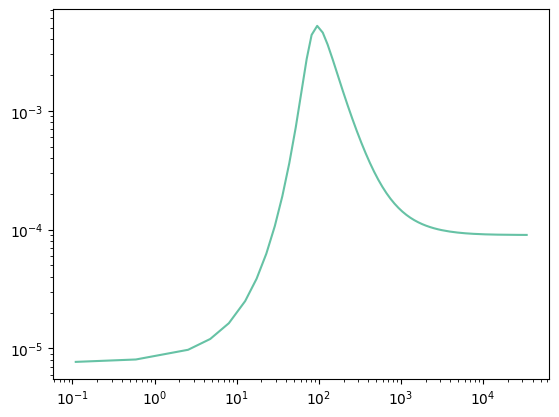

In [11]:
plt.loglog(t_vec, abundances[:, 2])

In [12]:
dy_d = []
for i in jnp.arange(len(t_vec)):
    dy0 = abd_model.Y_prime(t_vec[i], abundances[i, 2:3], args = args)
    dy_d.append(dy0[0])
dy_d = jnp.array(dy_d)

In [13]:
drates_dT = jnp.array([-3.78923770e-234, -4.35601643e-234, -5.00760728e-234,
       -5.75670494e-234, -6.61790464e-234, -7.60798661e-234,
       -8.74624326e-234, -1.00548553e-233, -1.15593245e-233,
       -1.32889713e-233, -1.80308838e-229, -3.39714110e-214,
       -2.86754312e-200, -1.42817707e-187, -5.39406662e-176,
       -1.94192141e-165, -8.20761886e-156, -4.92458816e-147,
       -4.98739366e-139, -9.98265969e-132, -4.55968097e-125,
       -5.41808648e-119, -1.88727636e-113, -2.14866068e-108,
       -8.82903245e-104, -1.43322551e-099, -9.97989240e-096,
       -3.21313664e-092, -5.12194210e-089, -4.30268299e-086,
       -2.01622803e-083, -5.55050274e-081, -9.41035195e-079,
       -1.02568334e-076, -7.47355062e-075, -3.77193703e-073,
       -1.36177045e-071, -3.62073303e-070, -7.27925046e-069,
       -1.13329234e-067, -1.39631153e-066, -1.38867499e-065,
       -1.13514488e-064, -7.75437590e-064, -4.49469889e-063,
       -2.24175694e-062, -9.74487944e-062, -3.73569083e-061,
       -1.27657049e-060, -3.92704322e-060, -1.09733225e-059,
       -2.80815207e-059, -6.63073489e-059, -1.45451723e-058,
       -2.98256431e-058, -5.74947894e-058, -1.04729651e-057,
       -1.81108808e-057, -2.98587622e-057, -4.71112226e-057,
       -7.13785498e-057, -1.04168902e-056, -1.46824118e-056,
       -2.00335838e-056, -2.65145628e-056, -3.40959864e-056,
       -4.26544386e-056, -5.19638051e-056, -6.16846820e-056,
       -7.13714447e-056, -8.04753769e-056, -8.83834694e-056,
       -9.44223610e-056, -9.79825960e-056, -9.84846541e-056,
       -9.54986758e-056, -8.89856722e-056, -7.90894745e-056,
       -6.64868295e-056, -5.23100761e-056, -3.80866955e-056,
       -2.54230226e-056, -1.55867095e-056, -8.94990328e-057,
       -4.97446317e-057, -2.76120808e-057, -1.56133656e-057,
       -9.07962732e-058, -5.44938391e-058, -3.37816405e-058,
       -2.16221900e-058, -1.42757557e-058, -9.71056269e-059,
       -6.79736905e-059, -4.89066137e-059, -3.61226787e-059,
       -2.73525092e-059, -2.12135015e-059, -1.68299258e-059,
       -1.36431528e-059])

drates= jnp.array([1.00000000e-200, 1.00000000e-200, 1.00000000e-200, 1.00000000e-200,
       1.00000000e-200, 1.00000000e-200, 1.00000000e-200, 1.00000000e-200,
       1.00000000e-200, 1.00000000e-200, 1.18022451e-196, 1.93418562e-181,
       1.42013469e-167, 6.15226161e-155, 2.02115880e-143, 6.32915136e-133,
       2.32680022e-123, 1.21433455e-114, 1.06971264e-106, 1.86235897e-099,
       7.39901490e-093, 7.64726991e-087, 2.31694542e-081, 2.29438762e-076,
       8.20029733e-072, 1.15783715e-067, 7.01252203e-064, 1.96377640e-060,
       2.72277054e-057, 1.98942869e-054, 8.10849916e-052, 1.94153016e-049,
       2.86304321e-047, 2.71421854e-045, 1.72015372e-043, 7.55114489e-042,
       2.37115378e-040, 5.48351647e-039, 9.58860781e-038, 1.29842399e-036,
       1.39143220e-035, 1.20360775e-034, 8.55736006e-034, 5.08439230e-033,
       2.56327998e-032, 1.11195390e-031, 4.20413971e-031, 1.40175985e-030,
       4.16628663e-030, 1.11473421e-029, 2.70922307e-029, 6.03014699e-029,
       1.23842381e-028, 2.36279779e-028, 4.21402668e-028, 7.06537923e-028,
       1.11937583e-027, 1.68362314e-027, 2.41421490e-027, 3.31304321e-027,
       4.36585016e-027, 5.54162797e-027, 6.79351683e-027, 8.06220229e-027,
       9.28062269e-027, 1.03799042e-026, 1.12940993e-026, 1.19670044e-026,
       1.23554575e-026, 1.24337701e-026, 1.21937723e-026, 1.16477678e-026,
       1.08228839e-026, 9.76817565e-027, 8.53943901e-027, 7.20201909e-027,
       5.83677643e-027, 4.51198481e-027, 3.29898575e-027, 2.25749062e-027,
       1.42958370e-027, 8.29963700e-028, 4.42569932e-028, 2.21024940e-028,
       1.06847549e-028, 5.15837388e-029, 2.53691245e-029, 1.28313448e-029,
       6.69802406e-030, 3.61139613e-030, 2.01043069e-030, 1.15447229e-030,
       6.83004782e-031, 4.15829306e-031, 2.60217614e-031, 1.67164418e-031,
       1.10092011e-031, 7.42618381e-032, 5.12424881e-032, 3.61291175e-032])

dtemps = jnp.array([0.00011474, 0.0001202,  0.00012593, 0.00013192, 0.00013821, 0.00014479,
 0.00015168, 0.0001589,  0.00016647, 0.0001744,  0.0001827,  0.0001914,
 0.00020051, 0.00021006, 0.00022006, 0.00023054, 0.00024152, 0.00025302,
 0.00026507, 0.00027769, 0.00029091, 0.00030476, 0.00031927, 0.00033448,
 0.0003504 , 0.00036709, 0.00038457, 0.00040288, 0.00042206, 0.00044216,
 0.00046321, 0.00048527, 0.00050837, 0.00053258, 0.00055794, 0.00058451,
 0.00061234, 0.00064149, 0.00067204, 0.00070404, 0.00073756, 0.00077268,
 0.00080947, 0.00084802, 0.0008884 , 0.0009307 , 0.00097501, 0.00102144,
 0.00107008, 0.00112103, 0.00117441, 0.00123033, 0.00128891, 0.00135028,
 0.00141458, 0.00148194, 0.0015525 , 0.00162642, 0.00170387, 0.001785
 ,0.00186999, 0.00195903, 0.00205231, 0.00215003, 0.00225241, 0.00235966,
 0.00247202, 0.00258972, 0.00271304, 0.00284222, 0.00297755, 0.00311933,
 0.00326786, 0.00342346, 0.00358647, 0.00375725, 0.00393615, 0.00412357,
 0.00431992, 0.00452562, 0.00474111, 0.00496686, 0.00520336, 0.00545112,
 0.00571068, 0.0059826 , 0.00626746, 0.00656589, 0.00687853, 0.00720606,
 0.00754918, 0.00790864, 0.00828522, 0.00867973, 0.00909302, 0.00952599,
 0.00997957, 0.01045476, 0.01095257, 0.01147409])

In [14]:
dtimes_acro = jnp.array([9.97708915e+07, 9.09170905e+07, 8.28485819e+07, 7.54957564e+07,
       6.87952083e+07, 6.26891078e+07, 5.71247484e+07, 5.20540931e+07,
       4.74333564e+07, 4.32226361e+07, 3.93855829e+07, 3.58890515e+07,
       3.27028354e+07, 2.97994058e+07, 2.71536728e+07, 2.47427730e+07,
       2.25458762e+07, 2.05439929e+07, 1.87198181e+07, 1.70575814e+07,
       1.55429110e+07, 1.41627104e+07, 1.29050467e+07, 1.17590440e+07,
       1.07147908e+07, 9.76325571e+06, 8.89620815e+06, 8.10614831e+06,
       7.38624210e+06, 6.73026160e+06, 6.13253151e+06, 5.58788027e+06,
       5.09159539e+06, 4.63938295e+06, 4.22732967e+06, 3.85186980e+06,
       3.50975403e+06, 3.19802150e+06, 2.91397420e+06, 2.65515369e+06,
       2.41931979e+06, 2.20443122e+06, 2.00862795e+06, 1.83021511e+06,
       1.66764826e+06, 1.51952009e+06, 1.38454856e+06, 1.26156520e+06,
       1.14950531e+06, 1.04739874e+06, 9.54361496e+05, 8.69588068e+05,
       7.92344500e+05, 7.21962013e+05, 6.57831219e+05, 5.99396841e+05,
       5.46152950e+05, 4.97638524e+05, 4.53433492e+05, 4.13155067e+05,
       3.76454476e+05, 3.43013923e+05, 3.12543845e+05, 2.84780404e+05,
       2.59483180e+05, 2.36433114e+05, 2.15430581e+05, 1.96293707e+05,
       1.78856770e+05, 1.62968770e+05, 1.48492129e+05, 1.35301473e+05,
       1.23282569e+05, 1.12331326e+05, 1.02352903e+05, 9.32608864e+04,
       8.49765325e+04, 7.74281048e+04, 7.05502289e+04, 6.42833385e+04,
       5.85731583e+04, 5.33702321e+04, 4.86295011e+04, 4.43099072e+04,
       4.03740422e+04, 3.67878192e+04, 3.35201780e+04, 3.05428141e+04,
       2.78299478e+04, 2.53580810e+04, 2.31058024e+04, 2.10536036e+04,
       1.91837131e+04, 1.74799341e+04, 1.59275087e+04, 1.45129924e+04,
       1.32241348e+04, 1.20497726e+04, 1.09797346e+04, 1.00047538e+04])

dtimes = T_to_t(dtemps)

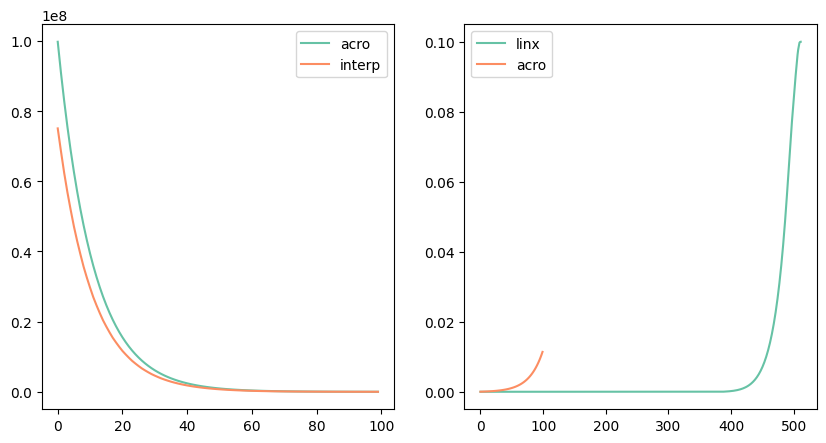

In [15]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(dtimes_acro, label = 'acro')
#plt.plot(t_vec, label = 'linx')
plt.plot(T_to_t(dtemps), label = 'interp')
plt.legend()
plt.subplot(122)
plt.plot(jnp.flip(t_to_T(t_vec)), label = 'linx')
plt.plot(dtemps, label = 'acro')
#plt.xlim(0, 100)
#plt.ylim(0, 0.01)
plt.legend()


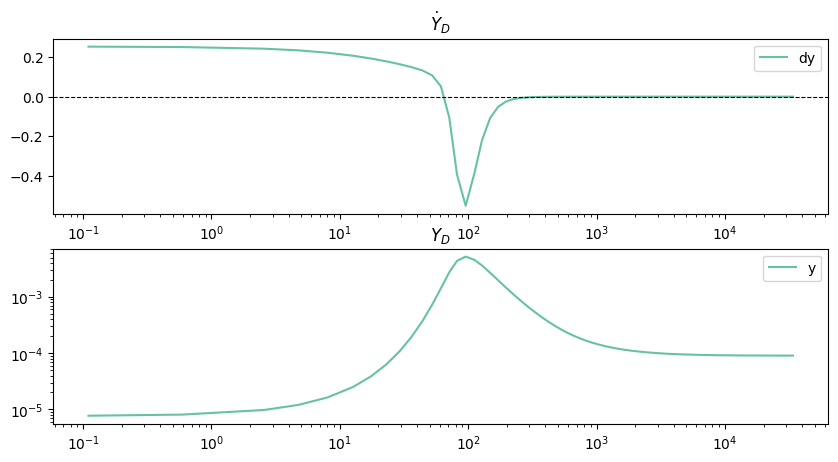

In [16]:
plt.figure(figsize = (10, 5))
plt.subplot(211)
plt.plot(t_vec, dy_d, label = 'dy')
plt.xscale('log')
plt.title(r'$\dot Y_D$')
#plt.xlim(1e2, 1e3)
#plt.ylim(-0.2, 0.2)
plt.axhline(0, color = 'k', ls = '--', lw = 0.8)
plt.legend()
plt.subplot(212)
plt.loglog(t_vec, abundances[:, 2], label = 'y')
plt.title(r'$Y_D$')
plt.legend()
#plt.xlim(1e2, 1e3)
#plt.ylim(1e-7, 1)

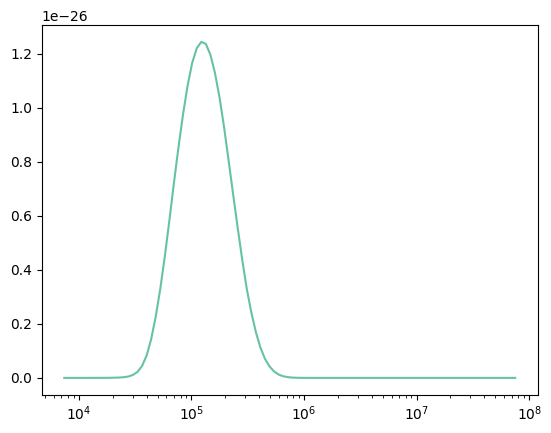

In [17]:
plt.plot(dtimes, drates)
plt.xscale('log')

(10000.0, 1000000.0)

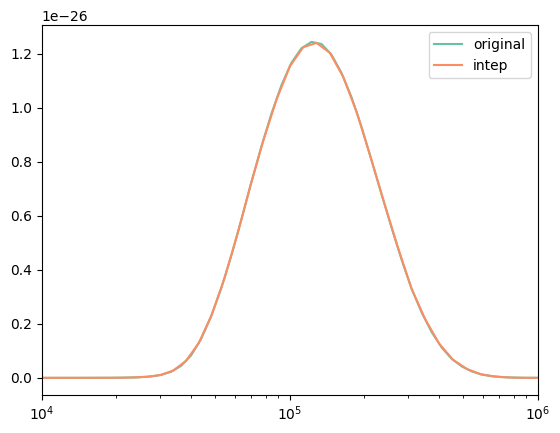

In [ ]:
#t_interp = jnp.flip(jnp.logspace(jnp.log10(t_vec[60]), jnp.log10(t_vec[100]), 100))
fixed_rate = jnp.interp(t_vec, jnp.flip(dtimes), jnp.flip(drates))
plt.plot(dtimes, drates,  label = 'original')
plt.plot(t_vec, fixed_rate, label = 'intep')
plt.legend()
plt.xscale('log')
plt.xlim(1e4, 1e6)

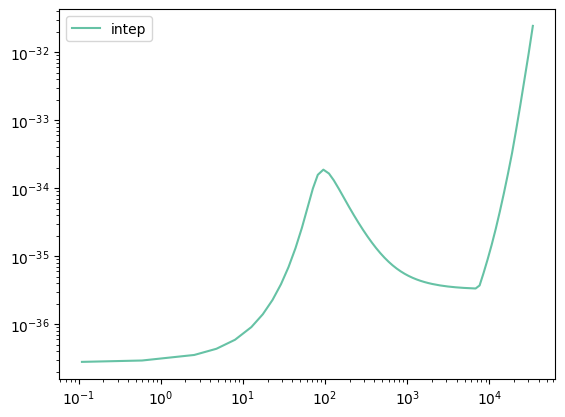

In [27]:
#t_interp = jnp.flip(jnp.logspace(jnp.log10(t_vec[60]), jnp.log10(t_vec[100]), 100))
fixed_rate = jnp.interp(t_vec, jnp.flip(dtimes), jnp.flip(drates))
plt.plot(t_vec, fixed_rate*abundances[:, 2], label = 'intep')
plt.legend()
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e4, 1e6)

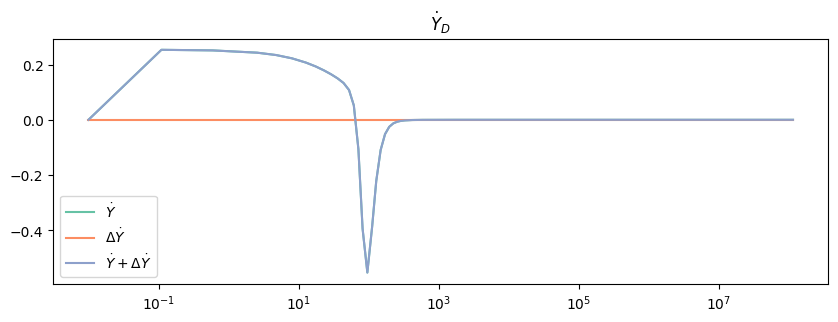

In [23]:
dy_d = jnp.nan_to_num(dy_d)
plt.figure(figsize = (10, 7))
plt.subplot(211)
plt.plot(t_vec, dy_d, label = r'$ \dot Y$')
plt.plot(t_vec, fixed_rate, label = r'$\Delta \dot Y$')
plt.plot(t_vec, fixed_rate + dy_d, label = r'$\dot Y + \Delta \dot Y$')
plt.xscale('log')
plt.title(r'$\dot Y_D$')
#plt.xlim(1e4, 1e6)
#plt.ylim(-1e-55, 1e-55)
plt.legend()

In [20]:
bkg_model = BackgroundModel()

# Call the class. 
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(0.), T_start = 0.1, T_end=0.0001)


abd_model_mod = AbundanceModel(
    NuclearRates(nuclear_net='key_PRIMAT_2023')
)

nuclear_rates_q = jnp.zeros(12)

sol_mod = abd_model_mod(
    rho_g_vec, rho_nu_vec, 
    rho_NP_vec, p_NP_vec,
    t_vec=t_vec, a_vec=a_vec, 
    eta_fac = jnp.asarray(1.), 
    tau_n_fac = jnp.asarray(1.), 
    nuclear_rates_q = nuclear_rates_q,
    save_history=True,
      pdi_rate=fixed_rate
)

abundances_mod = jnp.array([sol.evaluate(t) for t in t_vec])


TypeError: got an unexpected keyword argument 'pdi_rate'

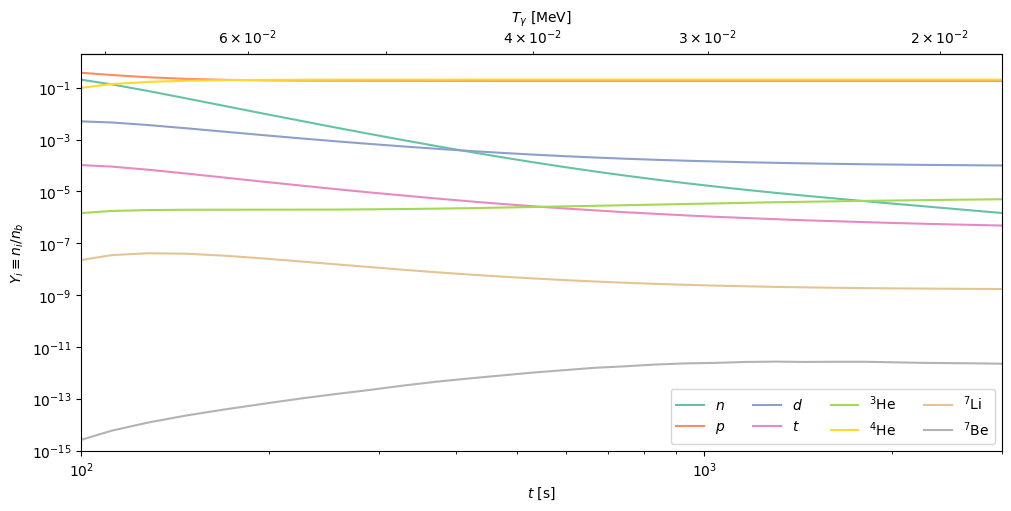

In [108]:
fig, ax = plt.subplots(layout='constrained', figsize=(10,5))

fig_labels = [r'$n$', r'$p$', r'$d$', r'$t$', r'$^3$He', r'$^4$He', r'$^7$Li', r'$^7$Be']

for i in jnp.arange(8):
    ax.loglog(t_vec, abundances[:, i], label=fig_labels[i])

ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$Y_i \equiv n_i / n_b$')

ax.tick_params(axis = 'x', which='both', top=False)

secax = ax.secondary_xaxis('top', functions=(t_to_T, T_to_t))
secax.set_xlabel(r'$T_\gamma$ [MeV]')

ax.set_xlim(1e2, 3e3)
ax.set_ylim(1e-15, 2.)

plt.legend(ncol=4, loc='lower right')

plt.show()